##### Tflite model convert

In [1]:
import tensorflow as tf
model=tf.keras.models.load_model("./I05c02_224.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
model_no_quant_tflite = converter.convert()


import pathlib

tflite_models_dir = pathlib.Path("./tflite_models/")
tflite_models_dir.mkdir(exist_ok=True, parents=True)
tflite_model_file = tflite_models_dir/"model.tflite"
tflite_model_file.write_bytes(model_no_quant_tflite)

2025-08-28 02:13:25.054030: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-28 02:13:25.056308: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-28 02:13:25.106614: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-28 02:13:25.107349: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-28 02:13:26.257442: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

INFO:tensorflow:Assets written to: /tmp/tmpw0j8p8lq/assets


INFO:tensorflow:Assets written to: /tmp/tmpw0j8p8lq/assets
2025-08-28 02:13:29.969419: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2025-08-28 02:13:29.969458: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-08-28 02:13:29.970258: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpw0j8p8lq
2025-08-28 02:13:29.972347: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2025-08-28 02:13:29.972371: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpw0j8p8lq
2025-08-28 02:13:29.978360: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2025-08-28 02:13:29.980209: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2025-08-28 02:13:30.122089: I tensorflow/cc/saved_model/loader.cc:215] Running initializatio

38723120

In [2]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)

optimization = tf.lite.Optimize.DEFAULT
converter.optimizations = [optimization]
tflite_model = converter.convert()

import pathlib

tflite_models_dir = pathlib.Path("./tflite_models_qt/")
tflite_models_dir.mkdir(exist_ok=True, parents=True)
tflite_model_file = tflite_models_dir/"model.tflite"
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpc9ks04j5/assets


INFO:tensorflow:Assets written to: /tmp/tmpc9ks04j5/assets
2025-08-28 02:13:32.991875: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2025-08-28 02:13:32.991913: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-08-28 02:13:32.992162: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpc9ks04j5
2025-08-28 02:13:32.994218: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2025-08-28 02:13:32.994243: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpc9ks04j5
2025-08-28 02:13:33.000040: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2025-08-28 02:13:33.118936: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /tmp/tmpc9ks04j5
2025-08-28 02:13:33.141570: I tensorflow/cc/saved_model/loader.cc:314] SavedModel

9693680

In [3]:
# 打开文件
class_names=[]
with open('output.txt', 'r') as file:
    # 逐行读取
    for line in file:
        # 去除行尾的换行符并处理数据
        data = line.strip()
        # 对数据进行分类处理
        # 例如，打印数据
        if data != "":
            class_names.append(data)
print(class_names)

['cats', 'dogs']


In [4]:
from PIL import Image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
IMAGE_SHAPE=224
SAMPLE_NAME= 'sample1.png'
IMG_CHANNELS=3
tflite_model_file = 'tflite_models/model.tflite'          
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

Im = Image.open(SAMPLE_NAME)
Im_resized = Im.resize((IMAGE_SHAPE, IMAGE_SHAPE))
Im = np.asarray(Im_resized)

Im = Im/255

input_data = np.array(Im, dtype=np.float32)

input_data = input_data.reshape(1, input_data.shape[0], input_data.shape[1], IMG_CHANNELS)

interpreter.set_tensor(input_index, input_data)
interpreter.invoke()
predictionval = interpreter.get_tensor(output_index)
prediction = np.argmax(predictionval)


print(predictionval,prediction,class_names[prediction])

[[0.83638775 0.16361225]] 0 cats


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


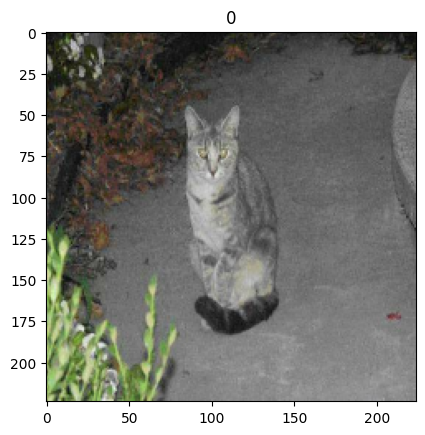

In [5]:
Im = Image.open(SAMPLE_NAME)
plt.imshow(Im)


plt.title(prediction)
#plt.axis('off')
plt.show()

In [6]:
#Use optimization

In [7]:
IMAGE_SHAPE=224
SAMPLE_NAME= 'sample2.png'
IMG_CHANNELS=3
tflite_model_file = 'tflite_models_qt/model.tflite'          
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

Im = Image.open(SAMPLE_NAME)
Im_resized = Im.resize((IMAGE_SHAPE, IMAGE_SHAPE))
Im = np.asarray(Im_resized)

Im = Im/255

input_data = np.array(Im, dtype=np.float32)

input_data = input_data.reshape(1, input_data.shape[0], input_data.shape[1],IMG_CHANNELS)

interpreter.set_tensor(input_index, input_data)
interpreter.invoke()
predictionval = interpreter.get_tensor(output_index)
prediction = np.argmax(predictionval)


print(predictionval,prediction,class_names[prediction])

[[0.9933528 0.0066472]] 0 cats


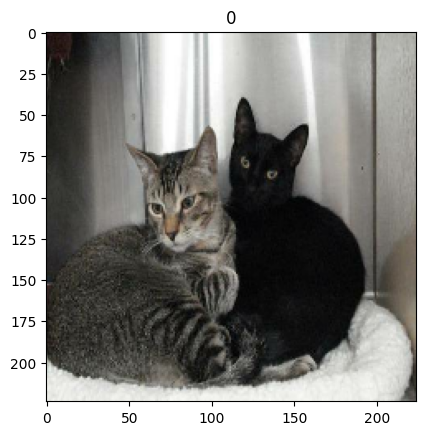

In [8]:
Im = Image.open(SAMPLE_NAME)
plt.imshow(Im)


plt.title(prediction)
#plt.axis('off')
plt.show()